# Power Flow Analysis

Solves the AC power flow and inspects system voltages for violations.

In [1]:
# This cell is hidden in the documentation.
from esapp import GridWorkBench
from esapp.components import *
import numpy as np
import matplotlib.pyplot as plt
import ast

with open('../data/case.txt', 'r') as f:
    case_path = ast.literal_eval(f.read().strip())

wb = GridWorkBench(case_path)

'open' took: 3.8183 sec


In [2]:
# Plotting functions (hidden from documentation)
import sys; sys.path.insert(0, "..")
from plot_helpers import plot_voltage_profile, plot_branch_loading

Import the case and instantiate the `GridWorkBench`.

```python
from esapp import GridWorkBench
from esapp.components import *

wb = GridWorkBench(case_path)
```

In [3]:
V = wb.pflow()
V.head()

0    0.993355-0.019419j
1    0.988897-0.067891j
2    0.981193-0.081206j
3    0.973882-0.097994j
4    0.988339-0.035719j
dtype: complex128

## Analyze Results

The `pflow()` method returns a Series of complex bus voltages. Extract voltage magnitudes and check for violations:

### Voltage Profile

Plot voltage magnitudes across all buses with violation limits:

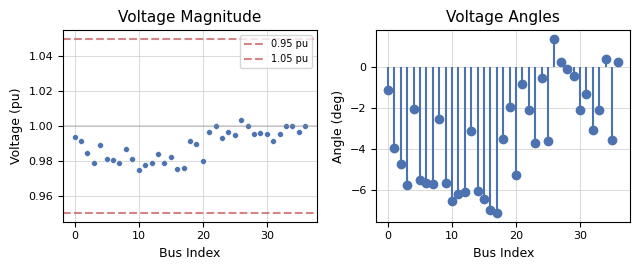

In [4]:
vmag = np.abs(V)
vang = np.angle(V, deg=True)

plot_voltage_profile(vmag, vang)

### Voltage Violations

Find buses with voltage below 0.98 per-unit:

In [5]:
low_v = V[abs(V) < 0.98]
print(f"Buses with voltage below 0.98 pu: {len(low_v)}")
low_v

Buses with voltage below 0.98 pu: 9


3     0.973882-0.097994j
7     0.973776-0.097237j
10    0.968600-0.110751j
11    0.971614-0.105523j
12    0.973420-0.103939j
14    0.973217-0.102800j
16    0.968262-0.118577j
17    0.968432-0.120988j
20    0.975803-0.089976j
dtype: complex128

In [6]:
min_voltage = abs(V).min()
print(f"Minimum voltage: {min_voltage:.4f} pu")
print(f"Maximum voltage: {abs(V).max():.4f} pu")

Minimum voltage: 0.9749 pu
Maximum voltage: 1.0034 pu


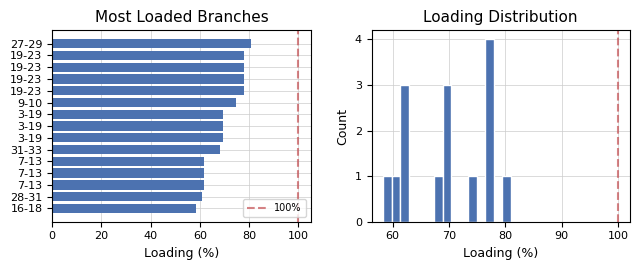

In [7]:
branches = wb[Branch, ['BusNum', 'BusNum:1', 'LineMVA', 'LineLimit', 'LinePercent']]
branches_loaded = branches.sort_values('LinePercent', ascending=False).head(15)

plot_branch_loading(branches_loaded)